# Creating Customer Segments

### Unsupervised Learning

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
    - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [5]:
# Write code here
data = pd.read_csv('customers.csv')
df = data.copy()

**Task 2: Drop Region and Channel column**

In [7]:
# Write code here
df.drop(columns=['Channel', 'Region'], axis=1, inplace=True)

**Task 3: Display first five rows** 

In [9]:
# Write code here
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### **Task 4: Display last five rows** 

In [11]:
# Write code here
df.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


#### **Task 5: Check the number of rows and columns**

In [13]:
# Write code here
df.shape

(440, 6)

#### **Task 6: Check data types of all columns**

In [15]:
# Write code here
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

**Task 7: Check for missing values and fill missing values if required.**

In [17]:
# Write code here
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## Data Exploration

#### **Task 8: Check summary statistics and store the resultant DataFrame in a new variable named *stats***

In [20]:
# Write code here
stats = df.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
df.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

**Question: Explain the summary statistics for the above data set**

**Answer:**
- All the data in the DataFrame(Fresh, Milk, Grocery, Frozen, Detergents_Paper, Detergents_Paper) is right skewed with high data values between Q3 and Q4.
- In Fresh, Mean is bigger than median. Minimum value is 3 and maximum is 112151. No null / missing values.
- In Milk, Mean is greater than median. Minimum value is 55 and maximum is 73498. No null / missing values.
- In Grocery, Minimum value is 3 and maximum is 92780. Mean is greater than median. No null / missing values.
- In Frozen, Minimum value is 25 and maximum is 60869. Mean is greater than median. No null / missing values.
- In Detergents_Paper, Minimum value is 3 and maximum is 40827. Mean is greater than median. No null / missing values.
- In Delicatessen, Minimum value is 3 and maximum is 47943. Mean is greater than median. No null / missing values.

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

**Logic in selecting the 3 samples: Quartiles**
- As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
- We can filter samples that are starkly different based on the quartiles.
    - This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

**Task 9: Select any random sample and assign the list to given variable**

In [27]:
# Write code here
indices = [95,328,181]
indices

[95, 328, 181]

These samples will be separated into another dataframe for finding out the details the type of customer each of the selected respresents

**Task 10: Make a dataframe of selected indices**

In [30]:
# Write code here
samples = df.iloc[indices]
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
95,3,2920,6252,440,223,709
328,16933,2209,3389,7849,210,1534
181,112151,29627,18148,16745,4948,8550


In [31]:
# Write code here
samples.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,43029.000000,11585.333333,9263.000000,8344.666667,1793.666667,3597.666667
std,60456.963106,15628.585423,7826.660271,8163.793256,2731.740532,4308.637874
min,3.000000,2209.000000,3389.000000,440.000000,210.000000,709.000000
25%,8468.000000,2564.500000,4820.500000,4144.500000,216.500000,1121.500000
50%,16933.000000,2920.000000,6252.000000,7849.000000,223.000000,1534.000000
75%,64542.000000,16273.500000,12200.000000,12297.000000,2585.500000,5042.000000
max,112151.000000,29627.000000,18148.000000,16745.000000,4948.000000,8550.000000


The selected sample values should be ranked amongst the whole of the data values to check their ranks and get a better understanding of spending of each sample/customer in each category

In [33]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
95,0.3,42.7,58.6,16.6,20.7,39.5
328,75.0,35.7,40.9,90.7,19.2,69.1
181,100.0,98.4,89.3,98.4,81.1,99.1


**Task 11: Draw a heatmap to show the above results achieved in** `percentile` **to have a better understanding.**

<Axes: >

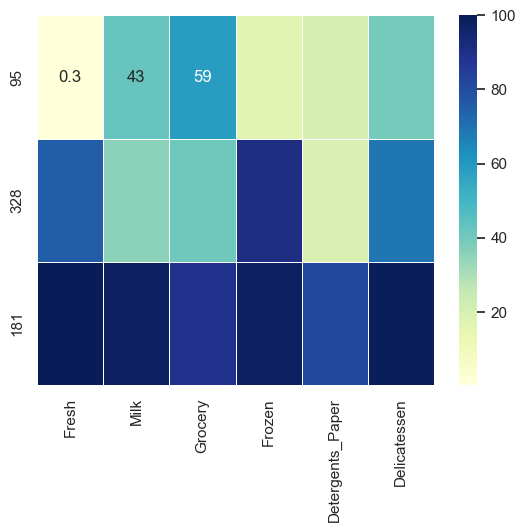

In [35]:
#Write code here
sns.heatmap(percentiles, annot=True, cmap="YlGnBu", linewidths=0.5)

#### Question: What type of customers can you identify by looking into the heatmap?

#### Answer:
- Customer no.95 is a bad customer, showing very week relation with the products overall.
- Customer no.328 is a normal customer, showing somewhat relation with all the products.
- Customer no.181 is a very good customer, showing ver strong relation with all the products.

**Task 12: Find the corelation among all the variables of whole dataframe and describe the findings you infer from the heatmapt.**

<Axes: >

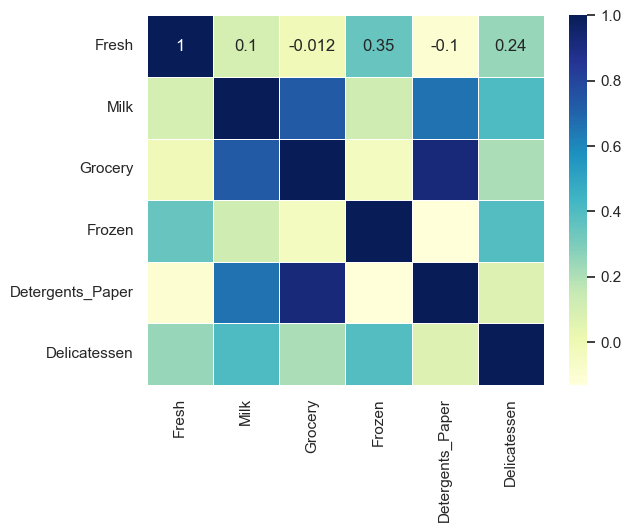

In [39]:
# Write the code here
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)

**Answer:**
- Fresh has a Good positive Relation with Frozen and a  weak positive Relation Delicatessen.
- Milk has a strong positive relation with Grocery and Detergents_Paper and a good positive relation with Delicatessen.
- Grocery has a Strong positive relation with Milk and Detergents_Paper and  a week positive relation with Delicatessen.
- Frozen has a Week positive relation with Fresh and Delicatessen.
- Detergents_Paper has a Strong positive relation with Milk, Grocery.
- Delicatessen has a weak positive relation with Fresh, Milk and Frozen

### Pair Plot

Pairplot is a plot which is used to give and over view of the data in a graphical grid form. The result it shows gives us a picture of variables themselves in a graphical way as well as a relationship of one variable with all the others. For more details you can [click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**Task 13: Make a pairplot using seaborn.**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

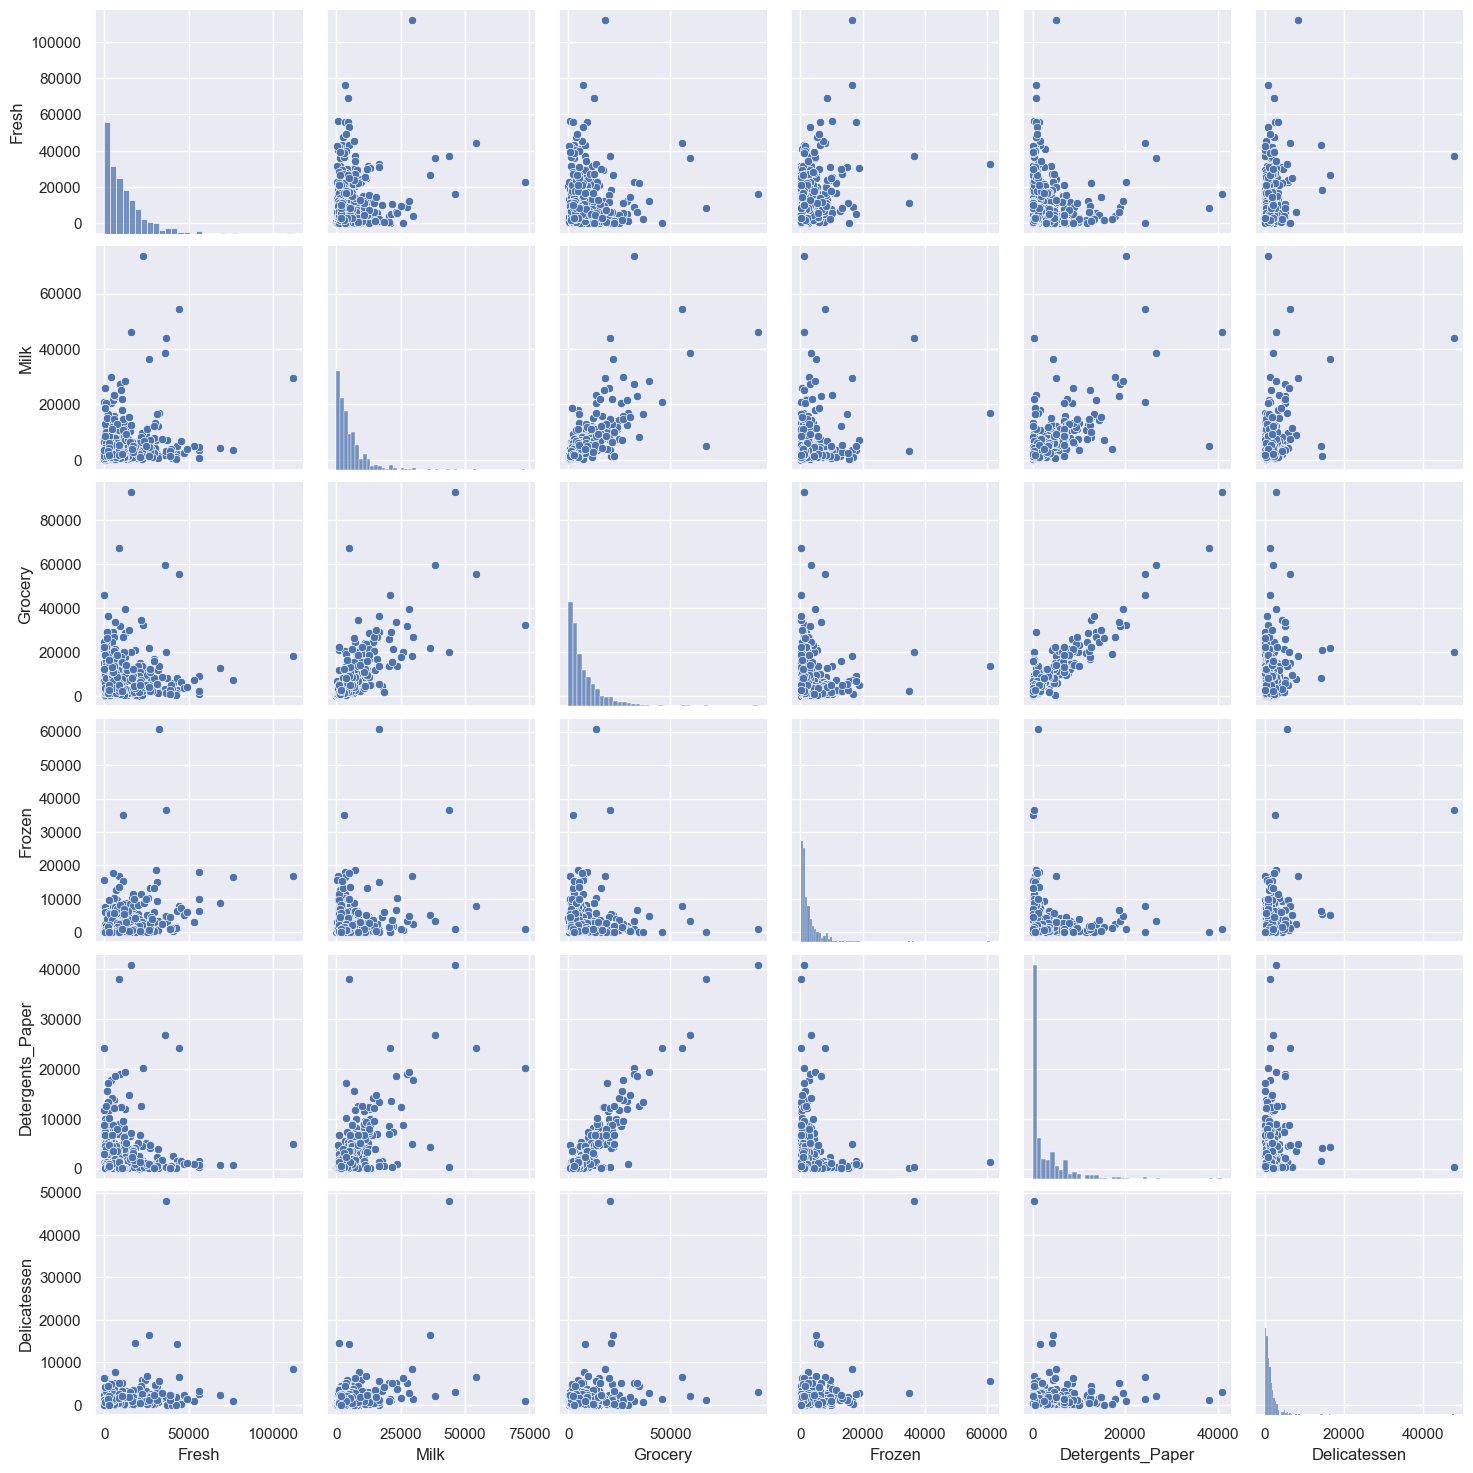

In [44]:
# write code here
sns.pairplot(data=df)

**Question: What findings do you get from the above plot? Describe in terms of skewned/normal form by looking at each variable and also look for any outliers that can be visually identified in the plot.**

**Answer:**
- There are Outliers in all of the pairs above.
- Right Skewness is observed in all the pairs.
- For Fresh most of the values are below 30,000, with other exceding points, 'outliers', going upto 100,000.
- For Milk most of the values are below 17,000, with other exceding points, 'outliers', going upto 70,000
- For Grocery most of the values are below 20,000, with other outliers going upto 80,000
- For Frozen most of the values are below 10,000, with other rare outliers going upto 40,000
- For Detergent_Paper most of the values are below 10,000, with rare outliers going upto 40,000
- For Delicatessen most of the values are below 10,000, with exteremly rare outliers going upto 50,000

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by normalizing it by **removing skewness** and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data.

**Task 14: Apply log on data for transforming it from skewed to normalized form. Use function** `np.log()` **and save the result in** `log_data`

In [50]:
#Write code here
log_data = np.log(df)
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to Q1. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to Q3. Again, use `np.percentile`.
 - Assign the calculation of an IQR for the given feature.
 - Query the data to filter out Outliers using IQR
 - remove data points from the dataset by adding indices to the outliers list

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points! 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [52]:
outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data.describe()[feature][4]
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data.describe()[feature][6]
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers=outliers+list(out.index.values)
    
# Select the indices for data points you wish to remove
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    
print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = log_data.describe()[feature][4]
C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = log_data.describe()[feature][6]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = log_data.describe()[feature][4]
C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = log_data.describe()[feature][6]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = log_data.describe()[feature][4]
C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = log_data.describe()[feature][6]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = log_data.describe()[feature][4]
C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = log_data.describe()[feature][6]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = log_data.describe()[feature][4]
C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = log_data.describe()[feature][6]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = log_data.describe()[feature][4]
C:\Users\user\AppData\Local\Temp\ipykernel_16120\2427257114.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = log_data.describe()[feature][6]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 75, 154]


**Question**<br>
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why?

**Answer:**
- Yes there are some data points that are considered outliers for more than one feature i.e. data point 154 is an outlier for Milk and grocery.
- For what i have learnt so far is that if we train a model to categorise/predict without outliers, then in deployment if the model encounters such a data point it will fail miserable, beacuse a deployed model is likely to encounter outliers.

**Task 15: Make a pairplot to check changes in data after pre-processing and using the** `good_data`

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

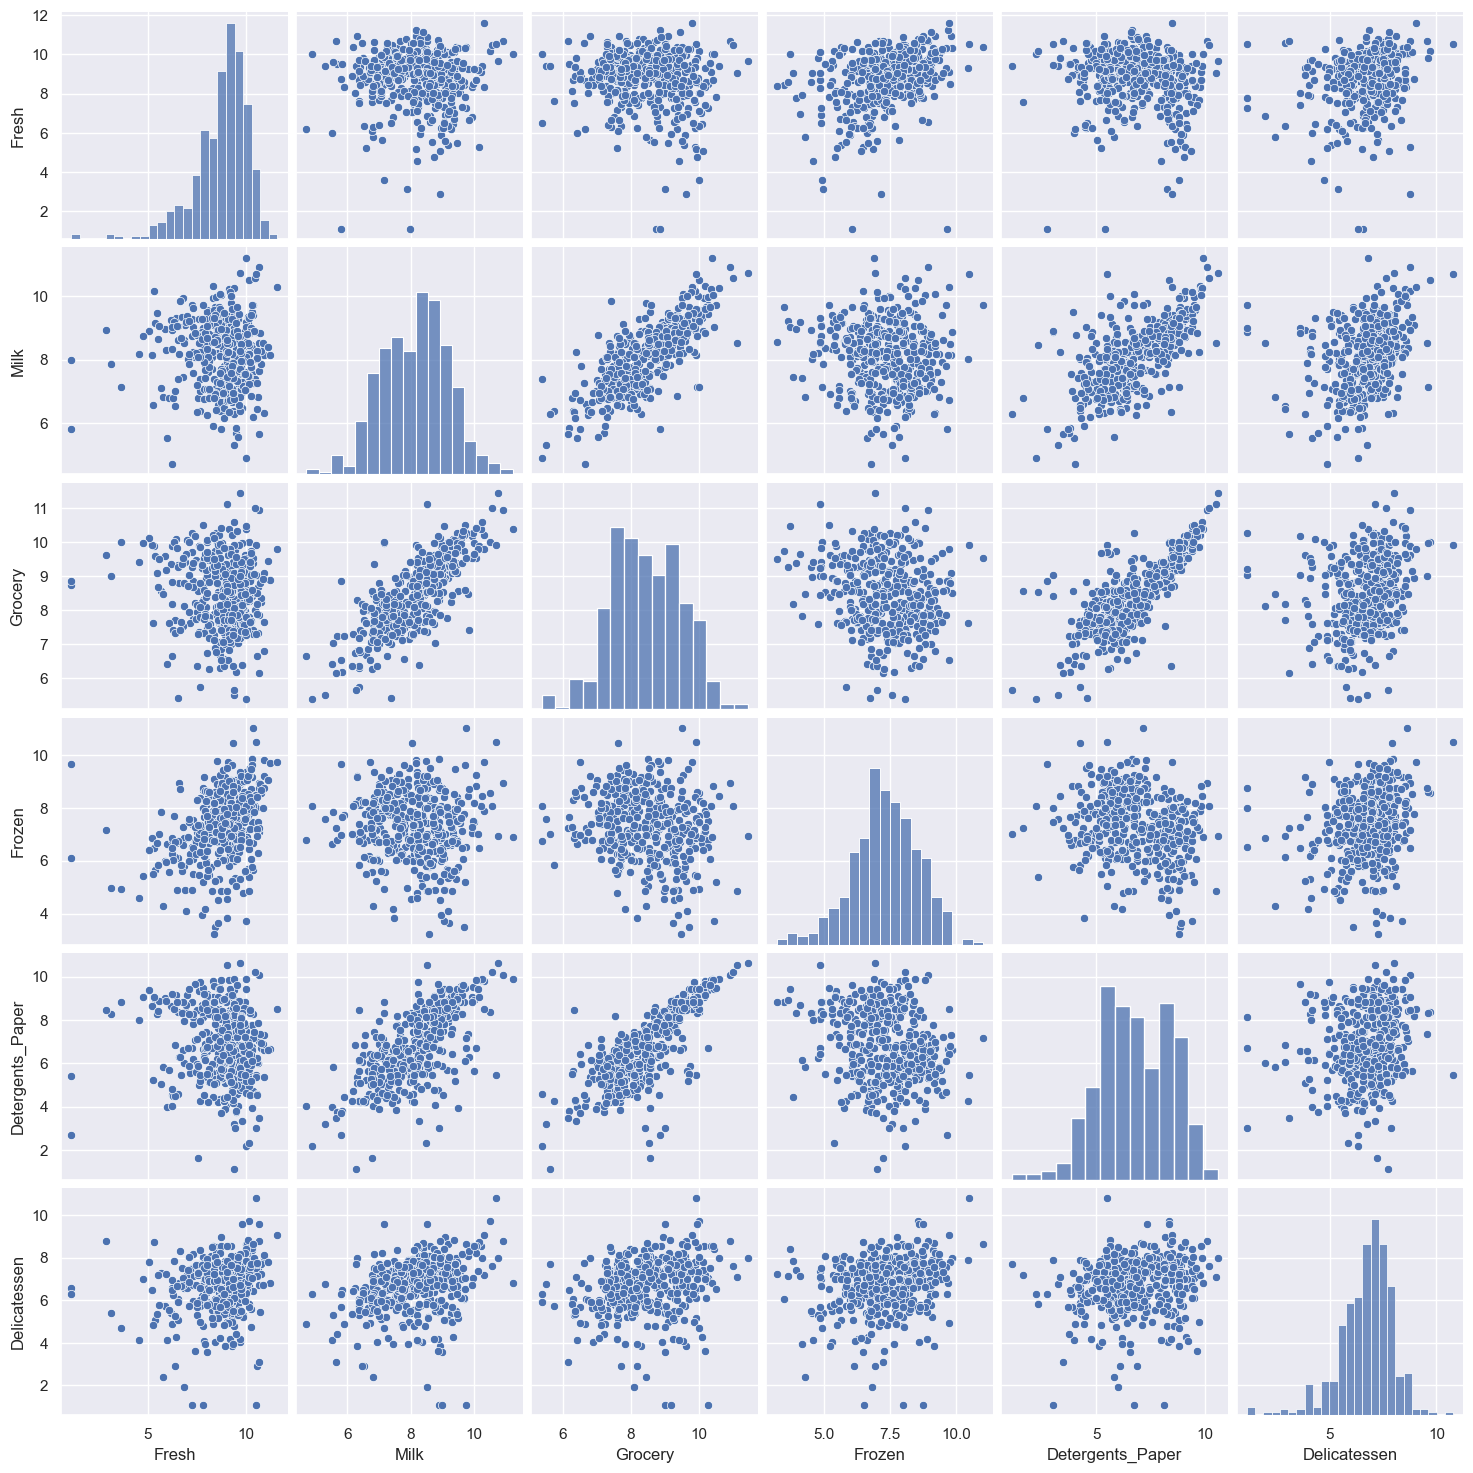

In [56]:
# Write the code here
sns.pairplot(data=good_data)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and 
 - Apply a PCA transformation of the good data.

**Task 16: Import PCA Library**

In [60]:
# Write your code here
from sklearn.decomposition import PCA

**Task 17: Apply PCA by fitting the good data with the same number of dimensions as features.**

In [62]:
# Write your code here
pca_ = PCA(n_components=good_data.shape[1], random_state=100)

In [63]:
# Write your code here
pca_data = pca_.fit_transform(good_data)
pca_data

array([[ 1.75798340e+00, -9.71115036e-03,  9.59028752e-01,
        -1.68244965e+00,  2.68019408e-01, -3.89130824e-01],
       [ 1.78866450e+00,  8.12250544e-01, -2.31474403e-01,
        -3.63127135e-03,  1.19381382e-01, -2.10647737e-01],
       [ 1.88335350e+00,  1.59913512e+00, -1.32039312e+00,
        -5.43245556e-01, -3.93354905e-01, -3.11668729e-01],
       ...,
       [ 3.74253498e+00,  8.56145640e-01,  9.88483168e-01,
        -8.87897232e-01,  5.02600793e-02,  2.05776604e-01],
       [-1.66914714e+00,  3.97968032e-01, -5.16104595e-01,
        -1.31886068e+00,  9.13006151e-02,  5.61145684e-03],
       [-7.39011451e-01, -3.69144772e+00,  2.03347706e+00,
        -9.92689393e-01,  3.10907713e-01, -1.73399536e-01]])

In [64]:
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca_)
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,0.6774,-0.0402,0.0195,-0.3150,0.2117,-0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


**Task 18: Find cumulative explained variance**

In [66]:
# Write the code here
cumsum_pca_results= pca_results['Explained Variance'].cumsum()
cumsum_pca_results

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

**Question**
How much variance in the data is explained ***in total*** by the first and second principal component? What about the first four principal components? How many components should be selected for reducing the dimensions? Give your answer along with the reason.

**Answer:**
- The First Principal Component explains 44% and the second (1st+2nd) Principal Component explains 71% of the variance in the data.
- The first four Principal Component explains 93% of the variance in the data.
- First Three Principal Component should be selected for reducing the dimensions, beacuse it retains 82% of the variation in data. Our aim is to reduce the variation in data and try to save the maximum information possible.

### Implementation: Dimensionality Reduction
In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

**Task 19: Apply PCA by fitting the good data with the selected number of components**

In [71]:
# write your code here
pca = PCA(n_components=2)

**Task 20: Transform the good data using the PCA fit above**

In [101]:
# write your code here
reduced_data = pca.fit_transform(good_data)
# reduced_data
pcs_samples = pca.fit_transform(log_data)
pcs_samples

array([[ 1.75098532e+00,  7.05152286e-02],
       [ 1.80036534e+00,  8.69753573e-01],
       [ 1.89373597e+00,  1.67662072e+00],
       [-1.12731297e+00,  1.45798229e+00],
       [ 7.96711467e-01,  2.46086569e+00],
       [ 1.08382370e+00,  3.92942430e-01],
       [ 1.13261002e+00, -2.01601862e-01],
       [ 1.58247377e+00,  9.68196420e-01],
       [ 8.71825215e-01, -5.96758895e-01],
       [ 2.88888315e+00,  7.41102520e-01],
       [ 2.11616786e+00,  7.48845431e-01],
       [-9.91451442e-01,  6.27014670e-02],
       [ 2.23259521e+00,  1.32782770e+00],
       [ 1.90404777e+00,  1.33385723e+00],
       [ 2.33337847e+00,  9.83570924e-01],
       [-4.17284069e-01, -8.14298928e-01],
       [ 2.80513630e+00, -1.95322632e+00],
       [-2.52569663e-01,  6.04494310e-01],
       [ 1.40226890e+00,  1.86546557e+00],
       [ 1.01598970e+00, -4.15101430e-01],
       [ 8.36133270e-01,  1.14744897e+00],
       [-1.72471835e+00, -1.47340654e-01],
       [ 1.54938706e-01,  2.82992022e+00],
       [ 2.

**Task 21: Create a DataFrame for the reduced data**

In [104]:
# write your code here
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_data

,Dimension 1,Dimension 2
0,1.757983,-0.009711
1,1.788665,0.812251
2,1.883353,1.599135
3,-1.155265,1.405201
4,0.784786,2.394294
...,...,...
430,-0.644850,2.858285
431,-3.184831,1.944772
432,3.742535,0.856146
433,-1.669147,0.397968


## Implementation: Creating Clusters

In this section, you will choose to use either a K-Means clustering algorithm  and hierarchical clustering to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Choosing K

**Before Implementing KMeans and hierarchical clustering, choose the optimal K using the following method**

- Silhouette Score
- Elbow Method

### Silhouette Score for K-Means

In [112]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Task 22-a: Check Silhouette Score for finding Optimal K**

In [119]:
silhouette_scores = []
X = reduced_data.values
# Checking K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    print(f"Clusters: {k}, Silhouette Score: {sil_score:.4f}")

Clusters: 2, Silhouette Score: 0.4261
Clusters: 3, Silhouette Score: 0.3974
Clusters: 4, Silhouette Score: 0.3318
Clusters: 5, Silhouette Score: 0.3431
Clusters: 6, Silhouette Score: 0.3473
Clusters: 7, Silhouette Score: 0.3578
Clusters: 8, Silhouette Score: 0.3501
Clusters: 9, Silhouette Score: 0.3446
Clusters: 10, Silhouette Score: 0.3317


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [121]:
# Find the best K
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because range of clusters starts at 2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


**Task 23-a: Plot a graph representing the Silhouette Score.**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


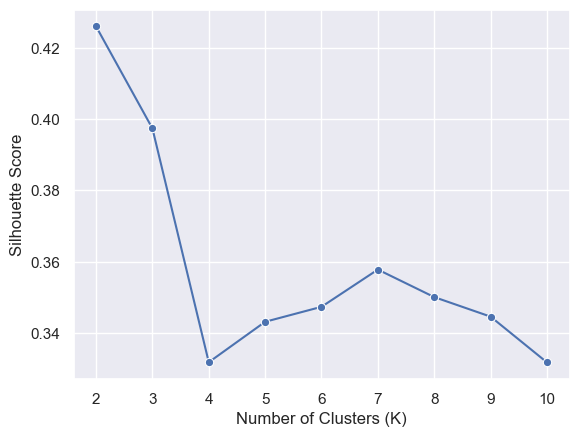

In [124]:
#add plot
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

**Task 22-b: Apply Elbow Method for finding Optimal K**

In [127]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [129]:
# write your code here
wcss

[3149.7003511545804,
 1733.323212630489,
 1288.9571985427922,
 1005.6541374387004,
 869.4422729904746,
 758.8914920900712,
 633.4244075287058,
 520.3531933114383,
 465.0532172976706,
 433.6240949798767]

**Task 23-b: Plot a graph representing the Elbow Method.**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


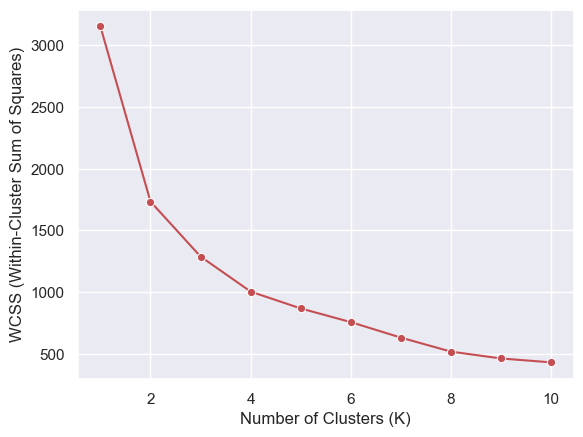

In [132]:
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## Implementation of K-Means

**Task 24: Implement KMeans using your choosen K**

In [136]:
# write your code here
kmean = KMeans(n_clusters=2, random_state=100)

In [138]:
# write your code here
preds = kmean.fit_predict(X)
preds

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

## Implementation Hierarchical Clustering

**Task 25: Implement Hierarchical(agglomerative) clustering using your choosen K**

In [142]:
# write your code here
from sklearn.cluster import AgglomerativeClustering
a_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [144]:
# write your code here
preds_agg = a_cluster.fit_predict(X) 
preds_agg

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

## Best Clustering Algorithm?

**You will be using** `adjusted rand index` **to select the best clustering algorithm by comparing each of the calculated labels with actual labels found in** `data['Channel]` . Before calculating the score, we need to make sure that the shape of true labels is consistent with the resultant labels.

In [148]:
true_labels = data['Channel'].drop(data['Channel'].index[outliers]).reset_index(drop = True)

**Task 26: Find the adjusted rand index for K-Means and Agglomerative Clustering**

In [151]:
# Import necessary libraries
from sklearn.metrics.cluster import rand_score

In [153]:
kmeans_score = rand_score(true_labels, preds)
print ('The score for Kmeans is ',kmeans_score)


The score for Kmeans is  0.8104348747285344


In [155]:
aggl_score = rand_score(true_labels, preds_agg)
print ('The score for Agglomerative Clustering is ', aggl_score)

The score for Agglomerative Clustering is  0.7200487313946713


**Question: Which has the best score and should be selected?**

**Answer:**
- The best score is given by K-Means which is 0.81 and will be selected.
- In rand index, score closer to 1 means good clustering and closer to 0 means worst clustering

## Visualizing the clusters

**Task 27: Get the centers for KMeans**

In [161]:
# Write code here
centers = kmeans.cluster_centers_
centers

array([[ 0.23998915, -0.26311075],
       [-1.62723385,  0.04613284],
       [ 3.60686888,  1.22817379],
       [ 1.92758052,  0.60841843],
       [-3.66061533, -0.80887055],
       [-1.75040776, -4.23744539],
       [ 2.7458787 , -2.26946887],
       [-0.91414524, -1.47976399],
       [-0.02863331,  2.39246132],
       [-2.03841093,  1.34784208]])

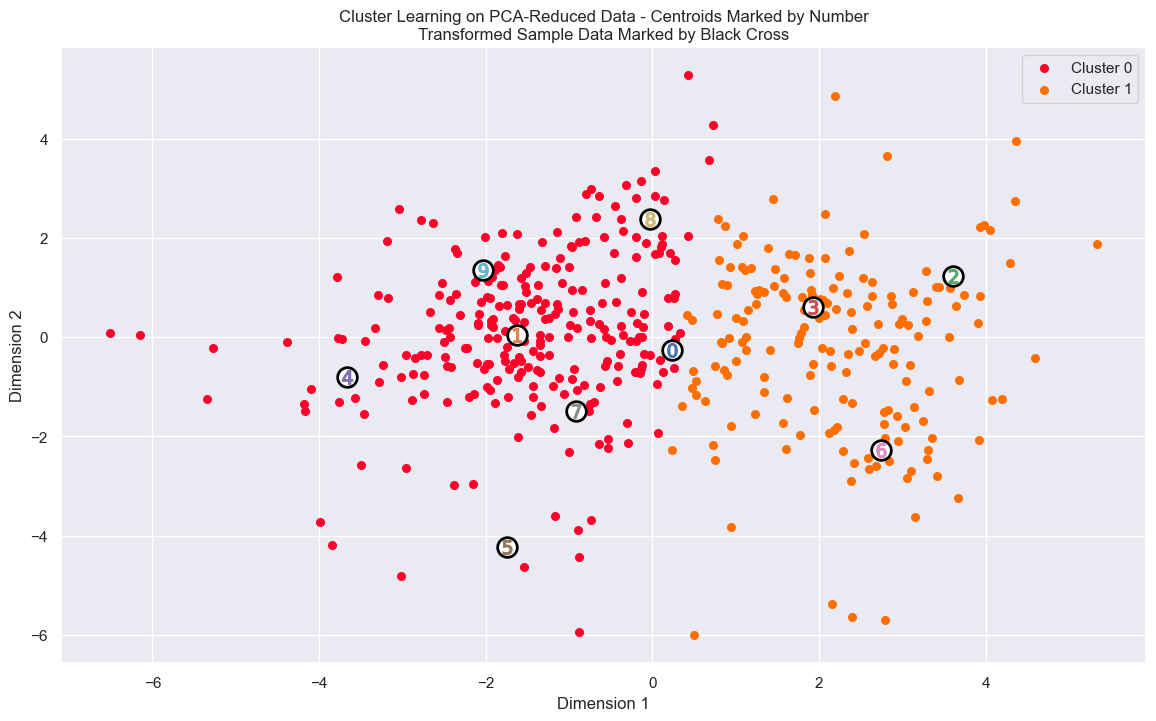

In [163]:
rs.cluster_results(reduced_data, preds, centers)

# Profiling

In [166]:
df_pred = df.drop(df.index[outliers]).reset_index(drop = True)
df_pred['pred'] = preds

In [170]:
df_pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,pred
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
430,29703,12051,16027,13135,182,2204,0
431,39228,1431,764,4510,93,2346,0
432,14531,15488,30243,437,14841,1867,1
433,10290,1981,2232,1038,168,2125,0


**Task 28: Get the average prices for each category from the original data frame for each cluster and then make a profile for each**

In [172]:
# write the code here
clustered_avg = df_pred.groupby('pred').mean(numeric_only=True)
clustered_avg

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
pred,,,,,,
0,14335.788462,2977.323077,3307.138462,4099.353846,474.984615,1363.026923
1,8751.840000,9964.120000,14751.417143,1605.617143,6374.800000,1794.971429


**Task 29: Make a radar chart to show a better profile for each cluster.**

In [174]:
# Write the code to import the library files for plotly and set your credentials
import plotly.express as px

In [196]:
# write the code here
# Credentials not needed

**Task 30: Make the data set for radar chart**

In [202]:
# Write your code here
radar_data = {'Cluster':[0,1],
             'Fresh':[14335.788462, 8751.840000],
             'Milk':[2977.323077,9964.120000],
             'Grocery':[3307.138462,14751.417143],
              'Frozen':[4099.353846, 1605.617143],
              'Detergents_Paper':[474.984615,6374.800000],
              'Delicatessen':[1363.026923,1794.971429]
             }
radar_data = pd.DataFrame(radar_data)
radar_data

,Cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,14335.788462,2977.323077,3307.138462,4099.353846,474.984615,1363.026923
1,1,8751.840000,9964.120000,14751.417143,1605.617143,6374.800000,1794.971429


**Task 31: Set the layout for your radar chart and plot it**

In [206]:
# Write your code here
radar_layout = radar_data.melt(id_vars='Cluster', var_name='Category', value_name='Average')
dfs = []
for c in radar_data['Cluster']:
    temp = radar_layout[radar_layout['Cluster'] == c].copy()
    first_row = temp.iloc[0]
    temp = pd.concat([temp, first_row.to_frame().T], ignore_index=True)
    dfs.append(temp)

df_closed = pd.concat(dfs, ignore_index=True)

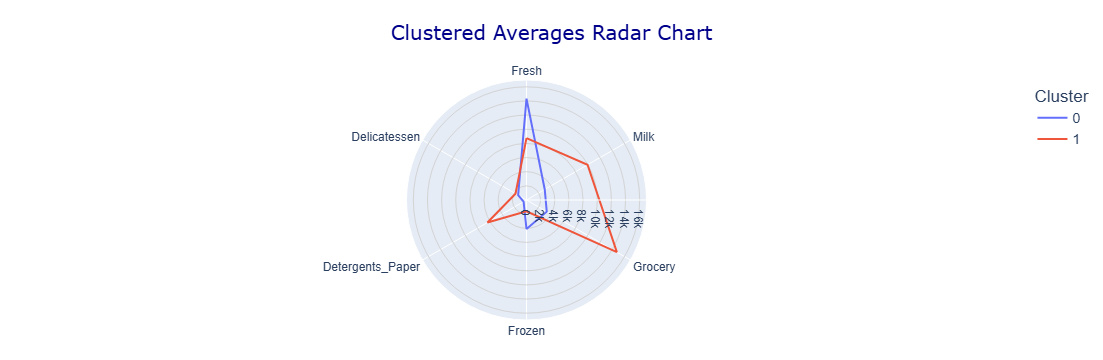

In [214]:
# Write your code here
fig = px.line_polar(df_closed, r='Average', theta='Category', color='Cluster', line_close=False,
                    title='Radar Chart of Clustered Averages')

# Set layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_closed['Average'].max() * 1.15],
            tickfont=dict(size=12),
            gridcolor='lightgrey',
            gridwidth=1
        ),
        angularaxis=dict(
            tickfont=dict(size=12),
            rotation=90,
            direction='clockwise',
        )
    ),
    title=dict(
        text='Clustered Averages Radar Chart',
        font=dict(size=20, family='Verdana', color='darkblue'),
        x=0.5,
        xanchor='center'
    ),
    legend=dict(
        title='Cluster',
        font=dict(size=14),
        bgcolor='rgba(0,0,0,0)'
    ),
    font=dict(family='Arial', size=13),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()

**Question: What can you infer from the above plot? Explain in detail**

**Answer:** 
- People in Category/ Cluster 0 spend alot on fresh and a little on frozen, grocery and milk.
- People in Category/ Cluster 0 spend alot on Grocery, Milk and Fresh. And apend a normal amount on Detergent_paper, and very less on frozen and delicatessen

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

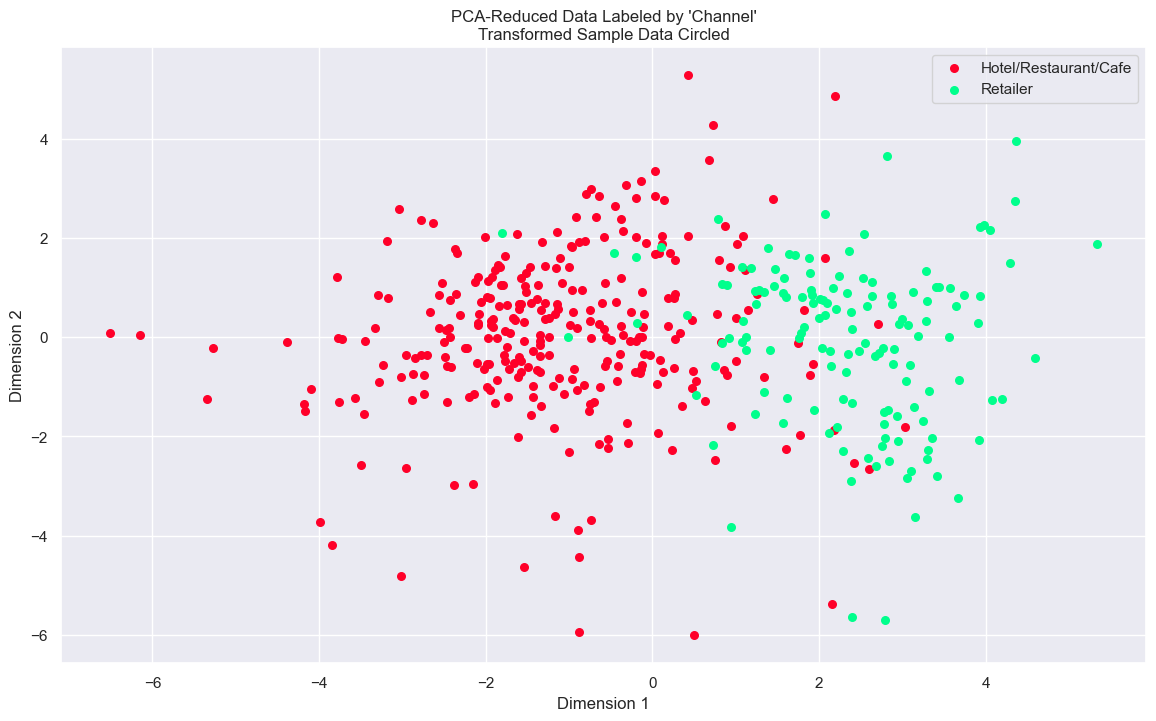

In [220]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers)

**Question:**
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
- There are alot more Hotel/Restaurant/Cafe customers than the Retail customers.
- No! These cannot be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution, beacuse there is no perfect sepration.
- Yes! Previous classification is not consistent, The new clustering is more consistent. It more realistice, even though classification are not purely one label.